# Parse dataset

In [2]:
# LOAD DATASET
import os
from collections import OrderedDict
from load_data import parse_XML


#Initialize data struct
corpus_tg="/Users/chiarasemenzin/Desktop/MscProject/corpus/Tagged/"
corpus_ut="/Users/chiarasemenzin/Desktop/MscProject/corpus/Untagged/"

TAG_DATA=OrderedDict()


# PARSE XML TAGGED
print("PARSING DATASET\n")
for root, dirs, files in os.walk(corpus_tg):
    files = [ fi for fi in files if fi.endswith(".xml")]
    for file in files:
        print("Parsing ",file,"...")
        phrase_list,lemmas=parse_XML.xml_iteration(corpus_tg+file)
        TAG_DATA[file]=[phrase_list,lemmas]


PARSING DATASET

Parsing  porcodioaugu.xml ...
Parsing  porcodiolenz.xml ...


In [3]:
# PARSE XML UNTAGGED

UNTAG_DATA=OrderedDict()

for root, dirs, files in os.walk(corpus_ut):
    files = [ fi for fi in files if fi.endswith(".xml")]
    for file in files:
        print("Parsing ",file,"...")
        try:
            phrase_list=parse_XML.xml_iteration(corpus_ut+file,tagged=False)
            UNTAG_DATA[file]=phrase_list
        except:
            continue
    print("Done.")

Parsing  1903AUGU-N.xml ...
Parsing  1922AUGU.xml ...
Parsing  1897LENZ-9.xml ...
Parsing  1897LENZ-8.xml ...
Parsing  1913GUEV-1.xml ...
Parsing  1897LENZ-11.xml ...
Parsing  1897LENZ-10.xml ...
Parsing  1910AUGU-4.xml ...
Parsing  1902AUGU.xml ...
Parsing  1897LENZ-1.xml ...
Parsing  1910AUGU-5.xml ...
Parsing  1897LENZ-3.xml ...
Parsing  1897LENZ-2.xml ...
Parsing  1910AUGU-2.xml ...
Parsing  1897LENZ-6.xml ...
Parsing  1897LENZ-7.xml ...
Parsing  1910AUGU-3.xml ...
Parsing  1621VALD.xml ...
Parsing  1910AUGU-1.xml ...
Parsing  1897LENZ-5.xml ...
Parsing  1897LENZ-4.xml ...
Parsing  1765FEBR-2.xml ...
Parsing  1765FEBR-3.xml ...
Parsing  1765FEBR-1.xml ...
Parsing  1903AUGU-1.xml ...
Parsing  1930MOES.xml ...
Done.


# Get data stats

In [4]:
## GET FREQUENCIES FUNCT DEF
def get_freqs(pool):
    freqs = {}
    for word in pool:
        if word not in freqs:
            freqs[word] = 1
        else:
            freqs[word] += 1
    sorted_fr=sorted(freqs.items(), key=lambda x:x[1])
    sorted_fr.reverse()
    return sorted_fr



In [5]:
## POOL UNTAGGED DATA
UNTAG_pool=[]
for key, value in UNTAG_DATA.items():
    for w in value:
        UNTAG_pool.append(w)

top_terms=get_freqs(UNTAG_pool)

print("Total untagged tokens: ",(len(UNTAG_pool)))
print("\nTotal untagged unique terms: ",(len(top_terms)))
print("\nTop 10 types: ",top_terms[0:10])
print("\nSum frequencies top 10: ",sum([pair[1] for pair in top_terms[0:10]]))

Total untagged tokens:  116548

Total untagged unique terms:  37027

Top 10 types:  [('piam', 1965), ('feichi', 1728), ('kiñe', 1502), ('tañi', 1081), ('mapu', 1077), ('Veimeu', 734), ('piŋei', 693), ('tëfachi', 646), ('domo', 603), ('Dios', 573)]

Sum frequencies top 10:  10602


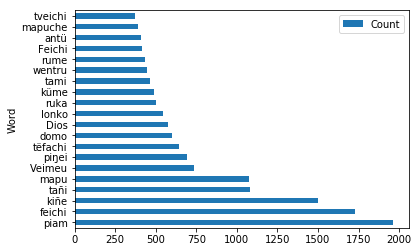

In [6]:
# 1/3 of the dataset is covered by the top 10 words
# Zipfff

import pandas 
import matplotlib.pyplot as plt

freqdf = pandas.DataFrame(top_terms[0:20], columns=['Word', 'Count']).set_index('Word')
freqdf.plot.barh()


In [7]:
## POOL TAGGED DATA

pool_tagged_sources=[]
pool_tagged_targets=[]

for key,value in TAG_DATA.items():
    sources=value[0]
    targets=value[1]
    for i in sources:
        for word in i:
            pool_tagged_sources.append(word)
            pool_tagged_targets.append(word)

print("Total tagged tokens: ",(len((pool_tagged_sources))))
print("Total types: ",(len(set(pool_tagged_sources))))

Total tagged tokens:  3962
Total types:  813


In [8]:
## GET UNSEEN WORDS

words=set(UNTAG_pool)
wordsu=set(pool_tagged_sources)

print("Total unseen words: ",len(set(words)-set(wordsu)))
print("Total seen words: ",len(wordsu.intersection(words)))

Total unseen words:  36615
Total seen words:  412


In [9]:
# def dummy_baseline()


# SPELLING NORMALIZER

In [10]:
# SPELL CHANGE 

from load_data import process_spelling

changes=(("ʎ","ll"),("t'","tr"),("ə","ü"),("f","v"),("k","c"))

    
UNTAG_DATA_norm=process_spelling.process_spelling(UNTAG_DATA,changes[0])
TAG_DATA_norm=process_spelling.process_spelling(TAG_DATA,changes[0])

UNTAG_DATA_norm=process_spelling.process_spelling(UNTAG_DATA_norm,changes[1])
TAG_DATA_norm=process_spelling.process_spelling(TAG_DATA_norm,changes[1])

UNTAG_DATA_norm=process_spelling.process_spelling(UNTAG_DATA_norm,changes[2])
TAG_DATA_norm=process_spelling.process_spelling(TAG_DATA_norm,changes[2])

UNTAG_DATA_norm=process_spelling.process_spelling(UNTAG_DATA_norm,changes[3])
TAG_DATA_norm=process_spelling.process_spelling(TAG_DATA_norm,changes[3])

UNTAG_DATA_norm=process_spelling.process_spelling(UNTAG_DATA_norm,changes[4])
TAG_DATA_norm=process_spelling.process_spelling(TAG_DATA_norm,changes[4])


PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING TAGGED FILE
PROCESSING TAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROCESSING UNTAGGED FILE
PROC

In [11]:
# POOL NORMALIZED DATA

# TAG

pool_tag_s_norm=[]
pool_tag_t_norm=[]

for key,value in TAG_DATA_norm.items():
    sources=value[0]
    targets=value[1]
    for i in sources:
        for word in i:
            pool_tag_s_norm.append(word)
    for t in targets:
        for word in t:
            pool_tag_t_norm.append(word)

print("Total tagged tokens: ",(len((pool_tag_t_norm))))
print("Total unique words: ",(len(set(pool_tag_t_norm))))

# UNTAG

## POOL UNTAGGED DATA
UNTAG_pool_norm=[]
for key, value in UNTAG_DATA_norm.items():
    for w in value:
        UNTAG_pool_norm.append(w)

print("\nTotal untagged tokens: ",len(UNTAG_pool_norm))
print("Total unique words: ",len(set(UNTAG_pool_norm)))



Total tagged tokens:  3962
Total unique words:  814

Total untagged tokens:  116548
Total unique words:  36455


In [12]:
words=set(UNTAG_pool_norm)
wordsu=set(pool_tag_s_norm)

print("Total unseen words: ",len(set(words)-set(wordsu)))
print("\nTotal seen words: ",len(wordsu.intersection(set(words))))

Total unseen words:  36036

Total seen words:  419


Less unique terms, less unseen words.

# FORMAT FOR LEMATUS

Baseline data

In [13]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    flat_words, flat_lemmas, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    flat_words, flat_lemmas, test_size=0.2, random_state=1)

/Users/chiarasemenzin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'flat_words' is not defined

Spell Checked

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pool_tag_s_norm, pool_tag_t_norm, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    pool_tag_s_norm, pool_tag_t_norm, test_size=0.1, random_state=1)

# write to file - no context


In [ ]:
#with open('lematus/data/languages/Mapu-' + str(k) + '-char-context-' + str(n) + '-semi/train-sources', "w") as s:
    #with open('lematus/data/languages/Mapu-' + str(k) + '-char-context-' + str(n) + '-semi/train-targets', "w") as t:


# TRAIN
with open('corpus/Tagged/train-sources', "w") as s:
    with open('corpus/Tagged/train-targets', "w") as t:
        for word, lemma in zip(X_train,y_train):
            word=word.lower()
            lemma=lemma.lower()
            word=" ".join(word)
            lemma=" ".join(lemma)
            s.write("{}\n".format(word))
            t.write("{}\n".format(lemma))
s.close()
t.close()


# DEV 
with open('corpus/Tagged/dev-sources', "w") as s:
    with open('corpus/Tagged/dev-targets', "w") as t:
        for word, lemma in zip(X_val,y_val):
            word=word.lower()
            lemma=lemma.lower()
            word=" ".join(word)
            lemma=" ".join(lemma)
            s.write("{}\n".format(word))
            t.write("{}\n".format(lemma))
s.close()
t.close()


# TEST
with open('corpus/Tagged/test-sources', "w") as s:
    with open('corpus/Tagged/test-targets', "w") as t:
        for word, lemma in zip(X_test,y_test):
            word=word.lower()
            lemma=lemma.lower()
            word=" ".join(word)
            lemma=" ".join(lemma)
            s.write("{}\n".format(word))
            t.write("{}\n".format(lemma))
s.close()
t.close()

In [ ]:
# TEST
from random import shuffle

shuffle(UNTAG_pool)
UNTAG_pool_shuffled=UNTAG_pool[0:700]
with open('corpus/Tagged/test-sources-untag', "w") as s:
    for word in UNTAG_pool_shuffled:
        word=word.lower()
        word=" ".join(word)
        s.write("{}\n".format(word))
s.close()


In [ ]:
#def format hard att


In [ ]:
# check predictions 
# what it was doing
# spelling 
# check unseen in test data and what is happening
# check test targets


#USE EXTRA TYPES

In [ ]:
(porcodiaz["porcodiolenz.xml"])